In [30]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import timeit

In [28]:
N=300

device = torch.device("cpu")
xtotal = torch.rand(N,50,4,device=device)
model = nn.Linear(4,4).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

goalw = torch.rand(4,4,device=device)
def fgoal(x):
    return(torch.transpose(torch.matmul(goalw,torch.transpose(x,0,1)),0,1))
def runloop():
    for i in range(N):
        optimizer.zero_grad()
        predictions = model(xtotal[i])
        loss = loss_fn(predictions, fgoal(xtotal[i]))
        loss.backward()
        optimizer.step()
        if i%10000==0:
            print("-" * 10)
            print(i,loss)
res = timeit.timeit(runloop, number=1)
print('time = ',res)                        
print('trained = ',list(model.parameters())[0])
    
print('target = ',goalw)



----------
0 tensor(1.2337, grad_fn=<MseLossBackward0>)
----------
10000 tensor(0.0007, grad_fn=<MseLossBackward0>)
----------
20000 tensor(9.0300e-06, grad_fn=<MseLossBackward0>)
time =  2.5061244999999417
trained =  Parameter containing:
tensor([[0.0466, 0.5434, 0.4821, 0.4603],
        [0.1302, 0.3719, 0.5377, 0.2003],
        [0.7582, 0.6168, 0.9020, 0.9465],
        [0.1231, 0.1913, 0.4370, 0.7973]], requires_grad=True)
target =  tensor([[0.0470, 0.5437, 0.4824, 0.4606],
        [0.1307, 0.3724, 0.5382, 0.2008],
        [0.7594, 0.6180, 0.9033, 0.9477],
        [0.1231, 0.1914, 0.4371, 0.7974]])


(array([  1.,   0.,   1.,   2.,   0.,   1.,   5.,   2.,   3.,   3.,   3.,
          4.,   8.,   7.,  15.,  10.,  15.,  16.,  17.,  18.,  23.,  26.,
         27.,  37.,  50.,  63.,  54.,  60.,  69.,  75.,  74.,  87.,  80.,
        112., 106., 107., 111., 124., 154., 148., 146., 146., 149., 147.,
        162., 144., 142., 136., 161., 151., 151., 128., 125., 122., 107.,
        110., 104.,  92.,  89.,  98.,  80.,  73.,  76.,  71.,  47.,  43.,
         30.,  33.,  35.,  19.,  31.,  21.,  26.,  21.,  12.,  11.,   8.,
          6.,   6.,   3.,   6.,   0.,   3.,   3.,   2.,   2.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-3.4523988 , -3.3761218 , -3.2998447 , -3.223568  , -3.147291  ,
        -3.071014  , -2.994737  , -2.91846   , -2.842183  , -2.765906  ,
        -2.689629  , -2.613352  , -2.537075  , -2.4607983 , -2.3845212 ,
        -2.3082442 , -2.2319672 , -2.1556902 , -2.0794134 , -2.0031364 ,
        -1.9268594 , -1.85

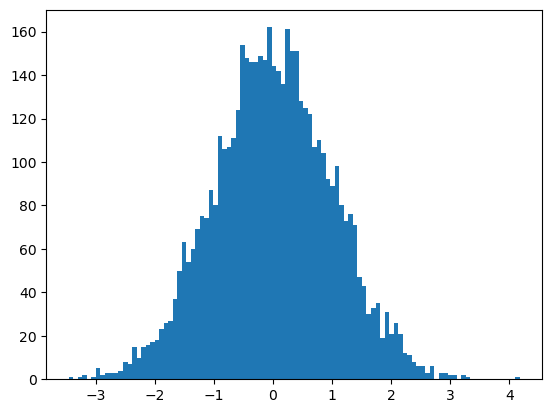

In [33]:
x=torch.randn(5000)
plt.hist(x,bins=100)